In [42]:
import os
import random
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, r2_score
import tensorflow as tf

In [2]:
path = './Dataset/'
data_dir = pathlib.Path(path)

In [3]:
class_names = np.array([sorted(item.name for item in data_dir.glob('*'))])
class_names

array([['Dataset.rar', 'Mild_Demented', 'Moderate_Demented',
        'Non_Demented', 'Very_Mild_Demented']], dtype='<U18')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

6400

In [5]:
def plot(path, class_name):
    print(path)
    plt.figure(figsize=(3,3))
    img = plt.imread(path)
    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: " + class_name)
    plt.imshow(img, cmap='gray')

Dataset\Mild_Demented\mild_308.jpg


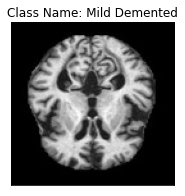

In [6]:
mild_demented = random.choice(list(data_dir.glob('Mild_Demented/*.jpg')))
plot(str(mild_demented), 'Mild Demented')

Dataset\Moderate_Demented\moderate_42.jpg


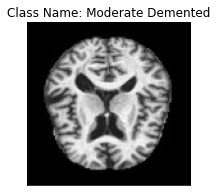

In [7]:
moderate_demented = random.choice(list(data_dir.glob('Moderate_Demented/*.jpg')))
plot(str(moderate_demented), 'Moderate Demented')

Dataset\Non_Demented\non_694.jpg


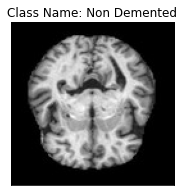

In [8]:
non_demented = random.choice(list(data_dir.glob('Non_Demented/*.jpg')))
plot(str(non_demented), 'Non Demented')

Dataset\Very_Mild_Demented\verymild_2022.jpg


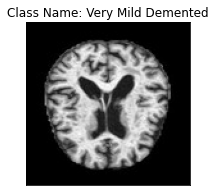

In [9]:
very_mild_demented = random.choice(list(data_dir.glob('Very_Mild_Demented/*.jpg')))
plot(str(very_mild_demented), 'Very Mild Demented')

In [10]:
batch_size = 32
img_height = 224
img_width = 224

train_data = tf.keras.utils.image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset='training',
                  seed=42,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)

val_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset='validation',
                                        seed=42,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_data, epochs=8, validation_data=val_data, batch_size=batch_size)

Epoch 1/8
160/160 [==============================] - 312s 2s/step - loss: 0.9451 - accuracy: 0.5594 - val_loss: 0.7985 - val_accuracy: 0.6562
Epoch 2/8
160/160 [==============================] - 359s 2s/step - loss: 0.6582 - accuracy: 0.7145 - val_loss: 0.4859 - val_accuracy: 0.8117
Epoch 3/8
160/160 [==============================] - 382s 2s/step - loss: 0.4298 - accuracy: 0.8205 - val_loss: 0.4263 - val_accuracy: 0.8320
Epoch 4/8
160/160 [==============================] - 311s 2s/step - loss: 0.2794 - accuracy: 0.8893 - val_loss: 0.2547 - val_accuracy: 0.9008
Epoch 5/8
160/160 [==============================] - 312s 2s/step - loss: 0.2108 - accuracy: 0.9154 - val_loss: 0.1463 - val_accuracy: 0.9531
Epoch 6/8
160/160 [==============================] - 307s 2s/step - loss: 0.1772 - accuracy: 0.9324 - val_loss: 0.1612 - val_accuracy: 0.9398
Epoch 7/8
160/160 [==============================] - 274s 2s/step - loss: 0.1409 - accuracy: 0.9461 - val_loss: 0.0960 - val_accuracy: 0.9648
Epoch 

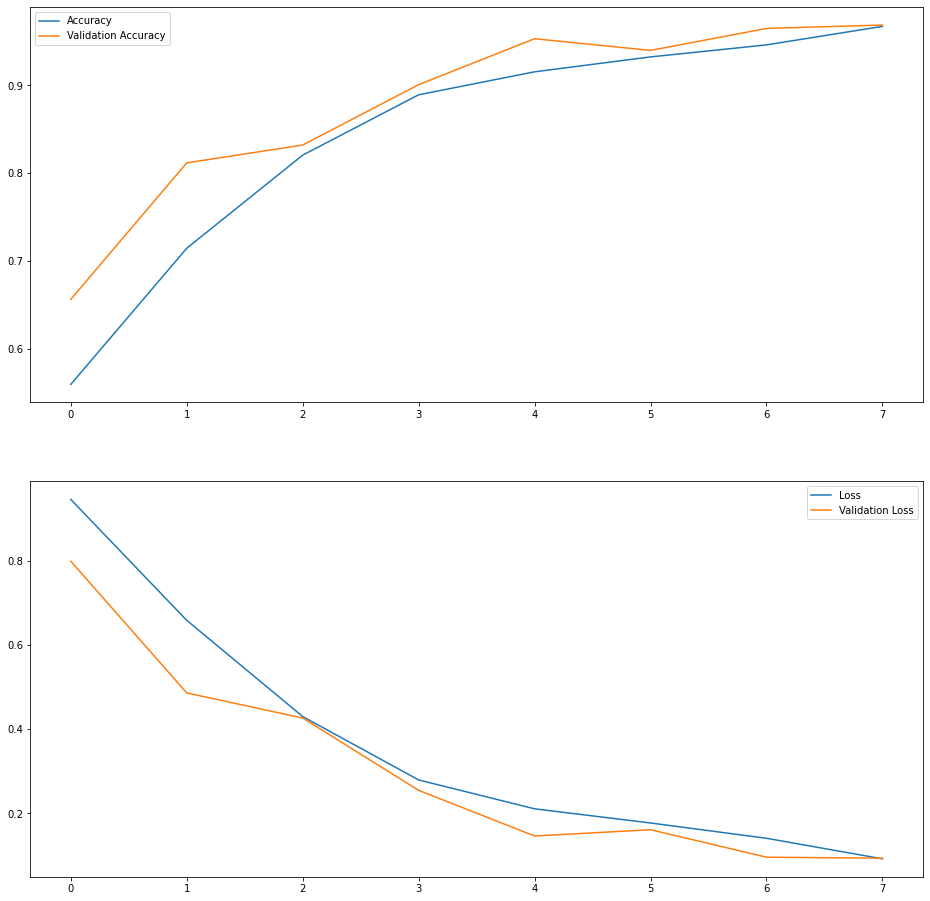

In [15]:
plt.figure(figsize=(16,16))

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.show()

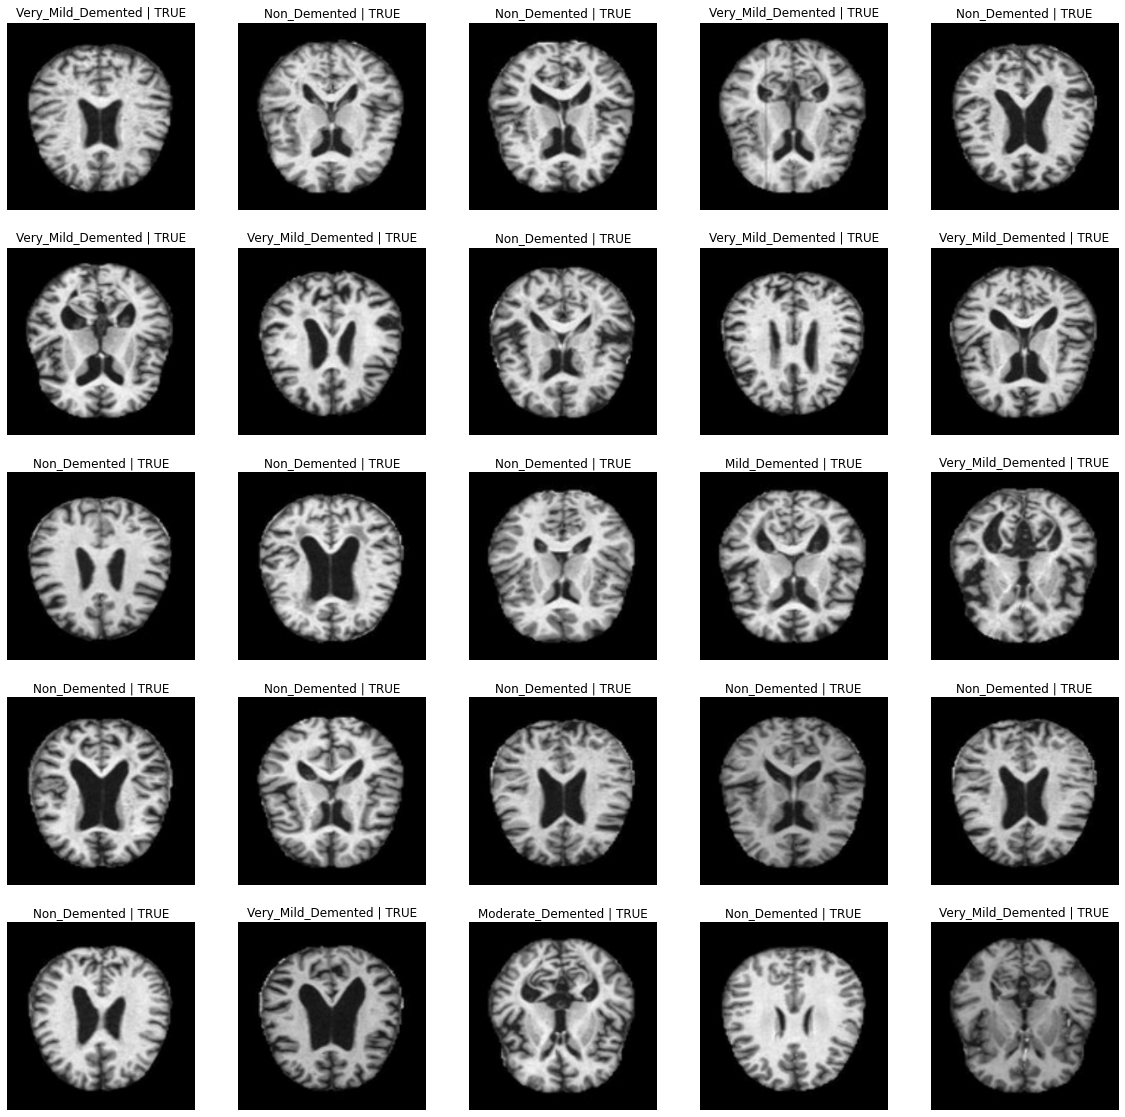

In [16]:
plt.figure(figsize=(20,20))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        
        img = images[i].numpy().astype('uint8')
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype('uint8'), cmap='gray')
        plt.title(class_names[predicted_class]+result)
        plt.axis('off')

In [35]:
preds = []
labels = []
for x, y in val_data:
    y_pred = model.predict(x)
    preds.append(np.argmax(y_pred, axis=1))
    labels.append(y)
preds = np.array(preds)
labels = np.array(labels)
preds = preds.reshape(-1,)
labels = labels.reshape(-1,)

<AxesSubplot:>

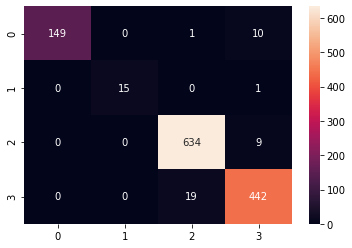

In [43]:
sns.heatmap(confusion_matrix(labels, preds), annot=True, fmt='d')